In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
pd.set_option('display.max_columns', None)

In [22]:
df=pd.read_csv('../data/raw/co2_emmission.csv')

In [23]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4.0,AS5,Premium Petrol,9.9,6.7,8.5,33.0,196
1,ACURA,ILX,COMPACT,2.4,4.0,M6,Premium Petrol,11.2,7.7,9.6,29.0,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Premium Petrol,6.0,5.8,5.9,48.0,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,Premium Petrol,12.7,9.1,11.1,25.0,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,NaN,AS6,Premium Petrol,12.1,8.7,10.6,27.0,244


In [24]:
df.shape

(7390, 12)

In [25]:
df.isna().sum()

Make                                 0
Model                                0
Vehicle Class                        9
Engine Size(L)                       0
Cylinders                            6
Transmission                         0
Fuel Type                           26
Fuel Consumption City (L/100 km)     0
Fuel Consumption Hwy (L/100 km)      0
Fuel Consumption Comb (L/100 km)     0
Fuel Consumption Comb (mpg)          6
CO2 Emissions(g/km)                  0
dtype: int64

In [26]:
df['Fuel Type'].value_counts()

Fuel Type
Regular Petrol    3623
Premium Petrol    3195
Ethanol            370
Diesel             175
Natural gas          1
Name: count, dtype: int64

In [27]:
for col in df.columns:
    if df[col].dtype in ['object']:
            df[col].fillna(df[col].mode()[0],inplace=True)
    else:
        df[col].fillna(df[col].mean(),inplace=True)

In [28]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [29]:
df.duplicated().sum()

np.int64(1107)

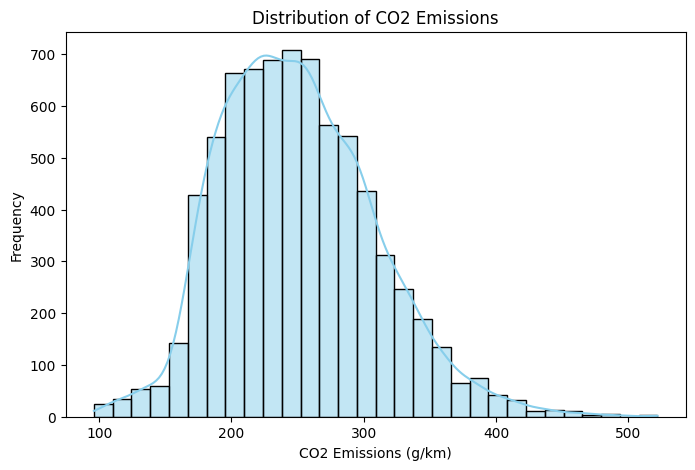

In [42]:
plt.figure(figsize=(8,5))
sns.histplot(df["CO2 Emissions(g/km)"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of CO2 Emissions")
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Frequency")
plt.savefig("../outputs/figures/co2_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


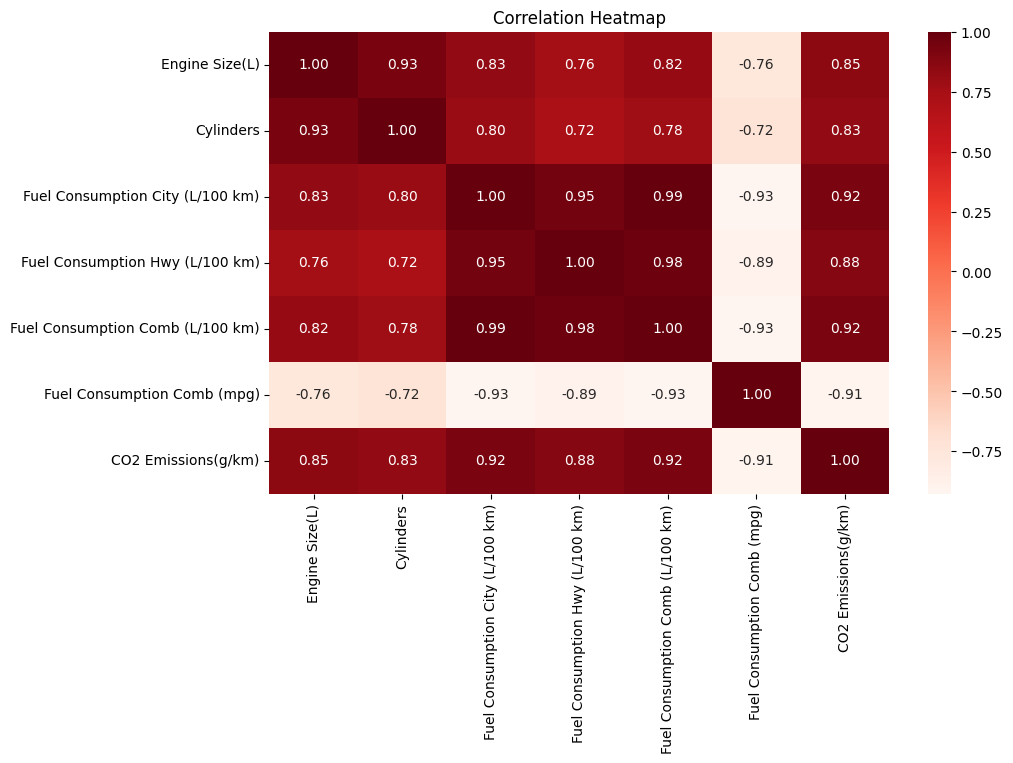

In [43]:
num_cols=df.select_dtypes(exclude=['object']).columns

plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(),annot=True,cmap='Reds',fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig("../outputs/figures/Correlation_Heatmap.png", dpi=300, bbox_inches="tight")

plt.show()

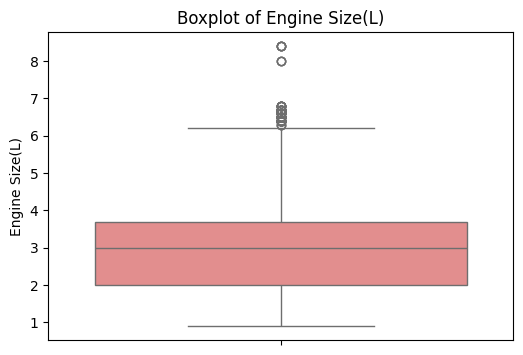

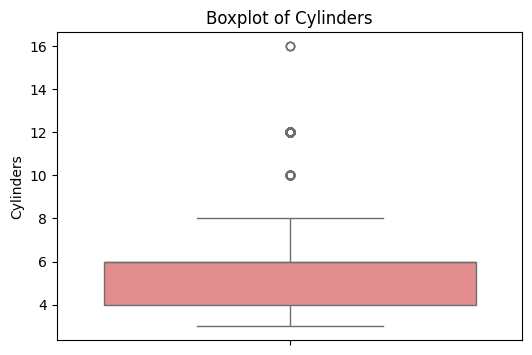

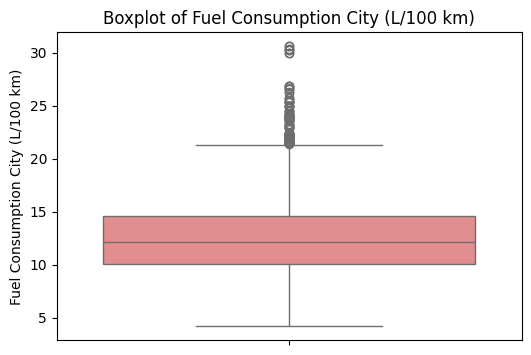

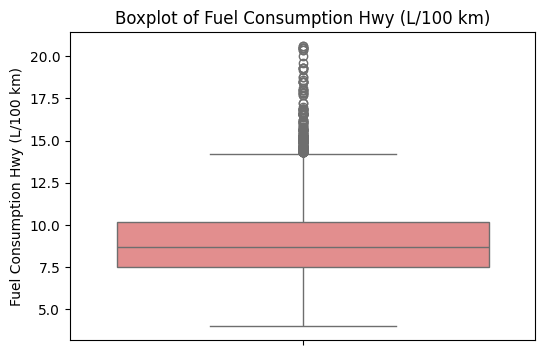

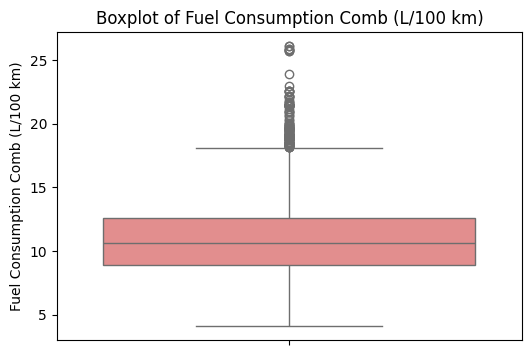

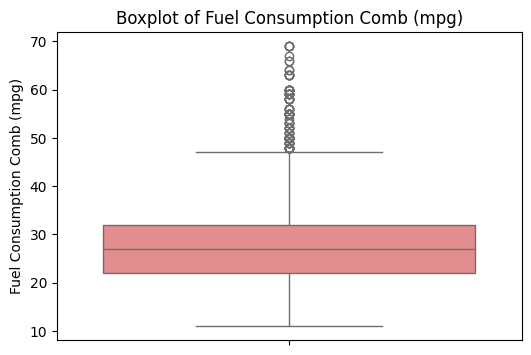

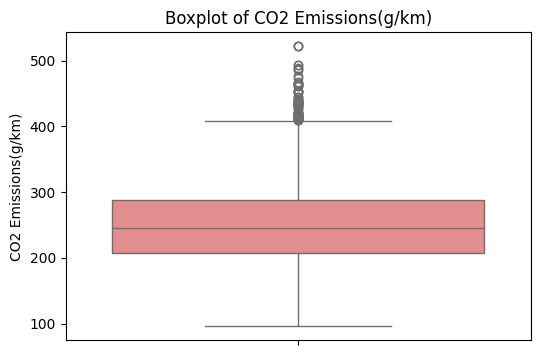

In [50]:
import os

# Ensure directory exists
os.makedirs("../outputs/figures", exist_ok=True)

# Loop through numerical columns and save boxplots
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col], color="lightcoral")
    plt.title(f"Boxplot of {col}", fontsize=12)
    
    # Clean filename (replace spaces, slashes, parentheses)
    safe_col = col.replace(" ", "_").replace("/", "_").replace("(", "").replace(")", "")
    plt.savefig(f"../outputs/figures/boxplot_{safe_col}.png", dpi=300, bbox_inches="tight")
    
    plt.show()

<function matplotlib.pyplot.savefig(*args, **kwargs) -> 'None'>

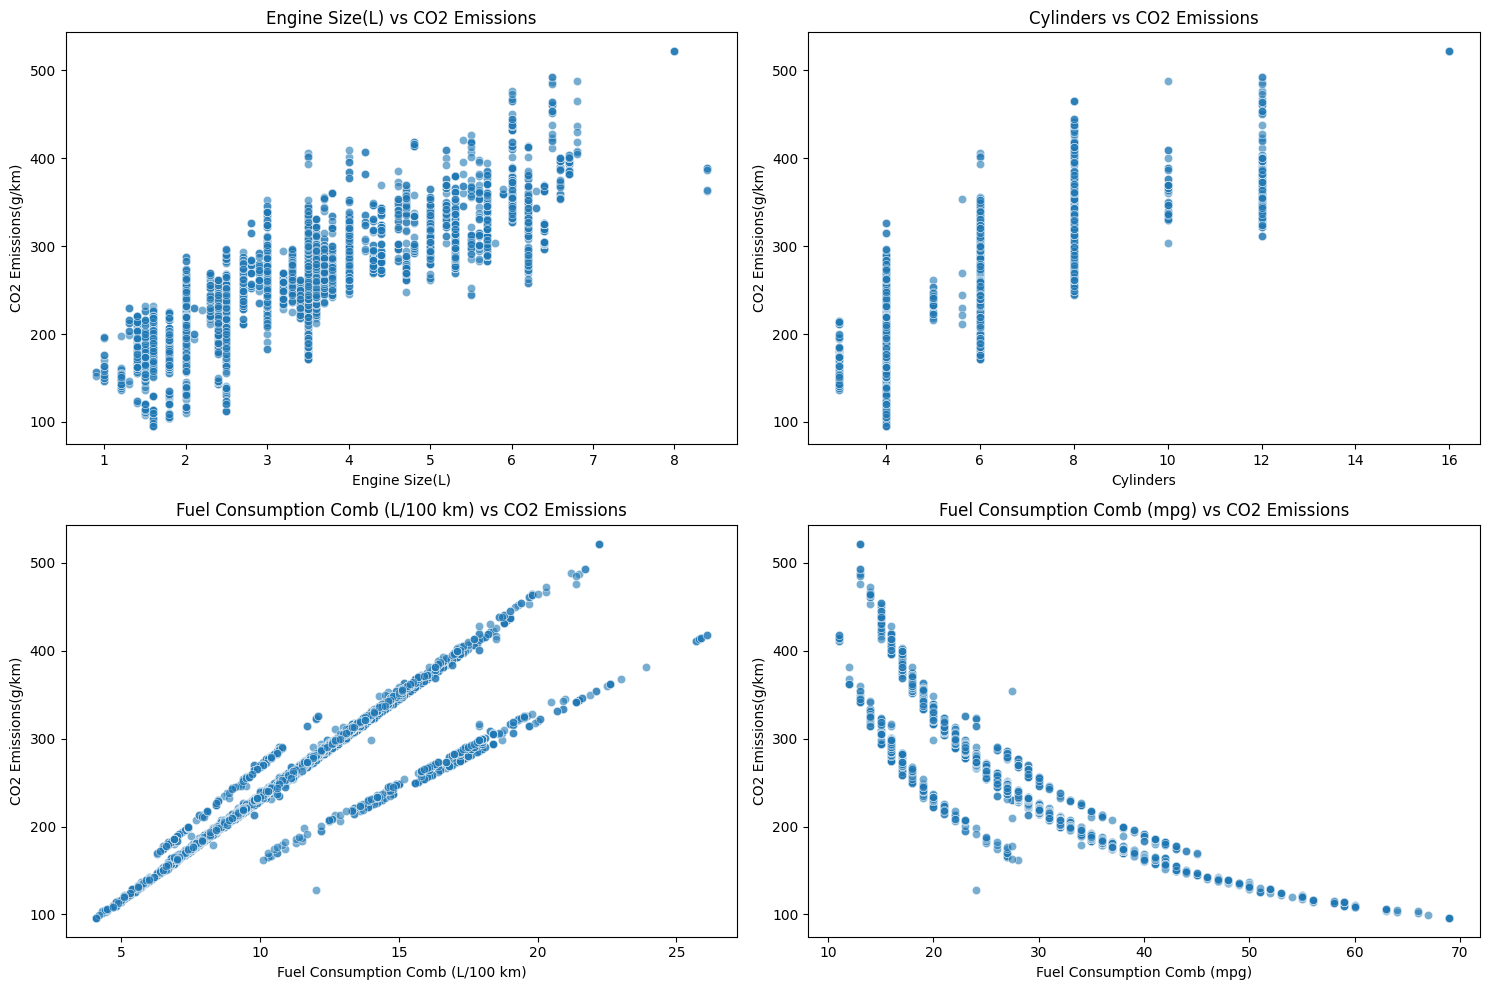

In [51]:
import os

# Ensure directory exists
os.makedirs("../outputs/figures", exist_ok=True)

plt.figure(figsize=(15,10))
features = ["Engine Size(L)", "Cylinders", "Fuel Consumption Comb (L/100 km)", "Fuel Consumption Comb (mpg)"]

for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[col], y=df["CO2 Emissions(g/km)"], alpha=0.6)
    plt.title(f"{col} vs CO2 Emissions")

plt.tight_layout()

# Save the entire multi-plot figure
plt.savefig
